<a href="https://colab.research.google.com/github/aryan802/EDA_Project_Collab_Notebook/blob/main/22BDS0266.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

===========================

Name: Aryan Jain

Roll No: 22BDS0266

============================

## Phase 1

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Display settings
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")

Loading Dataset

In [3]:
# Load Dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/credit%20card.csv"
df = pd.read_csv(url)

In [4]:
# Dimensions
print("\n--- Dataset Dimensions ---")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")


--- Dataset Dimensions ---
Rows: 5000, Columns: 14


In [5]:
# Summary Statistics
print("\n--- Dataset Info ---")
print(df.info())

print("\n--- Summary Statistics ---")
print(df.describe())

print("\n--- First 5 Rows ---")
print(df.head())


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   object 
 10  Securities Account  5000 non-null   object 
 11  CD Account          5000 non-null   object 
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   object 
dtypes: float64(1), int64(9), object(4)
memory usage: 547.0+ KB
None

--- Summary Stati

Data Handling and Cleaning

In [6]:
# Missing Value Analysis
# Treat "?" as NaN
df = pd.read_csv(url, na_values=['?'])
missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_counts, 'Percentage': missing_percent})

print("\n--- Missing Values ---")
print(missing_df[missing_df['Missing Values'] > 0])


--- Missing Values ---
                    Missing Values  Percentage
Personal Loan                   11        0.22
Securities Account               1        0.02
CD Account                       2        0.04
CreditCard                       1        0.02


Data Cleaning

In [7]:
# Numeric columns - fill with median
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Categorical columns - fill with mode
cat_cols = df.select_dtypes(exclude=np.number).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Drop duplicates if any
df.drop_duplicates(inplace=True)

print("\nMissing values handled (median/mode), duplicates removed")


Missing values handled (median/mode), duplicates removed


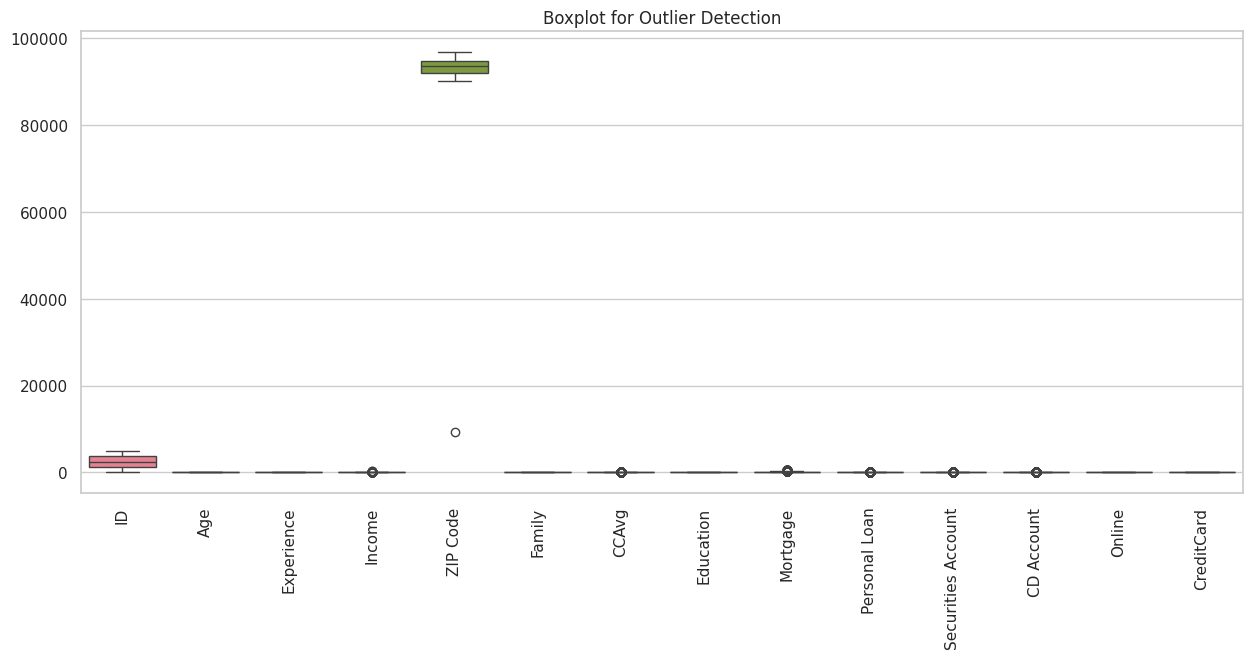

In [8]:
# Outlier Detection
plt.figure(figsize=(15, 6))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=90)
plt.show()

Univariate Analysis

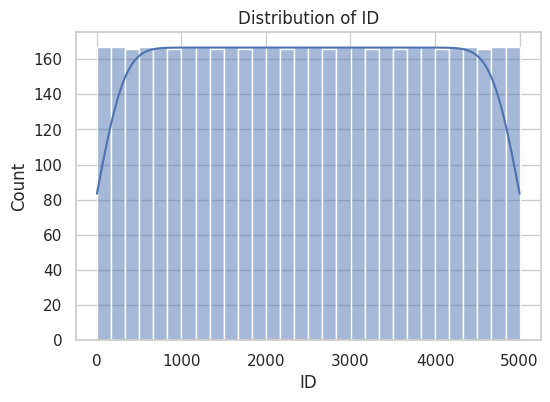

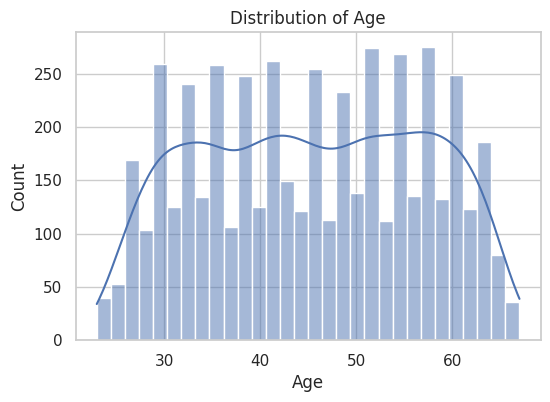

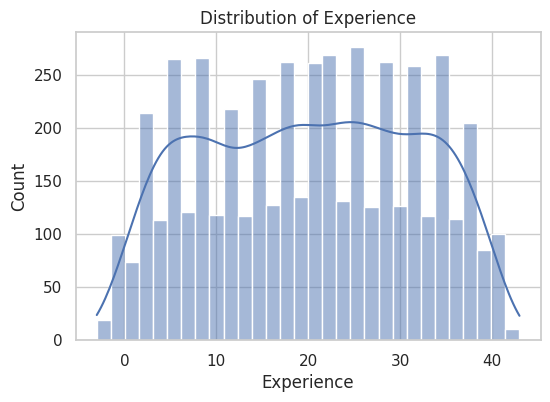

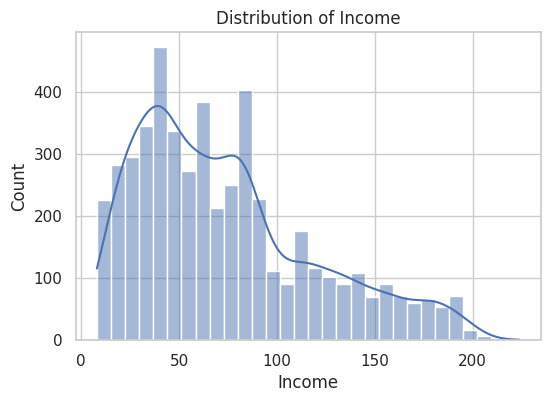

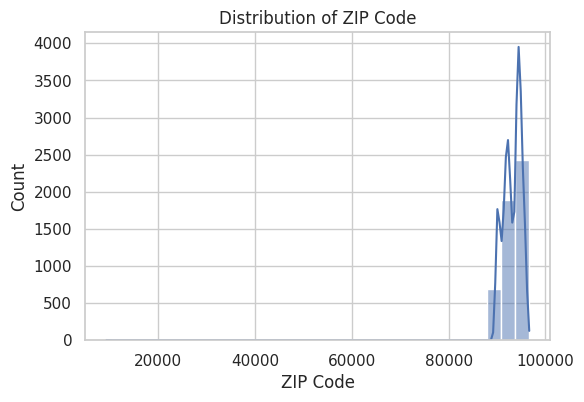

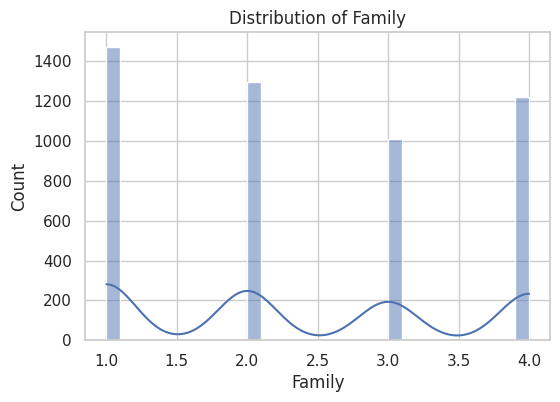

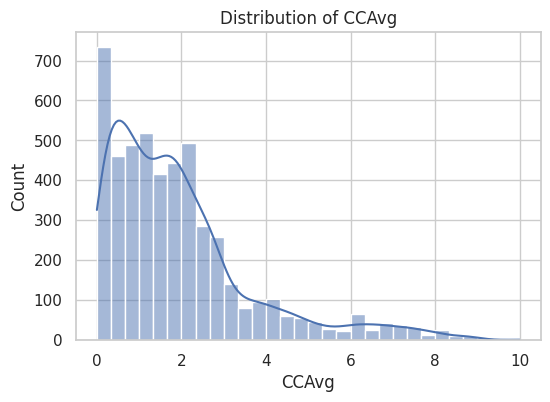

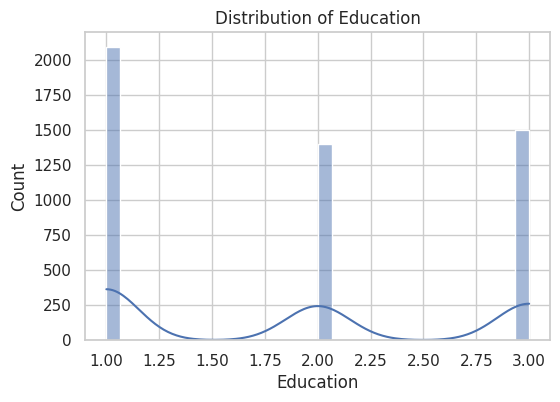

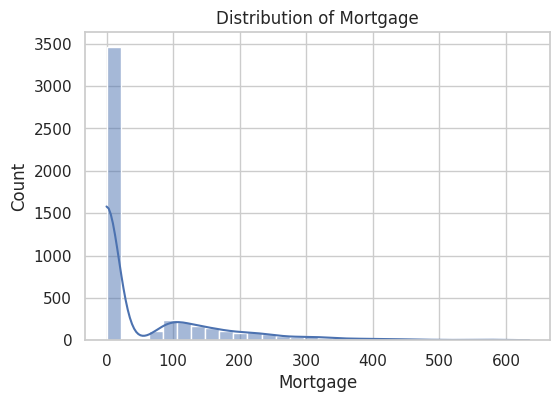

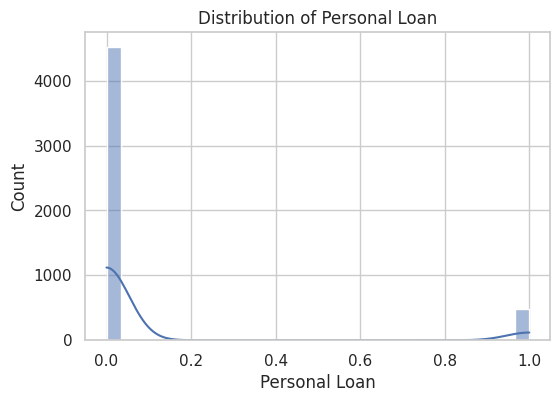

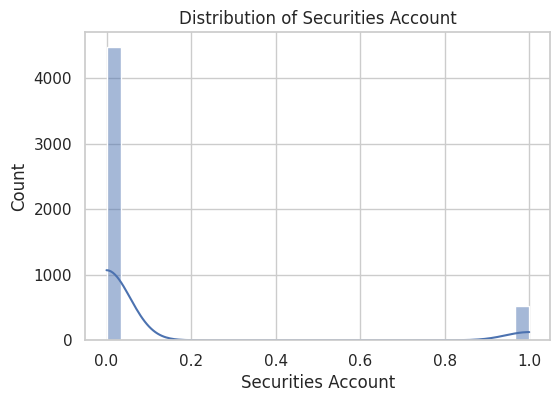

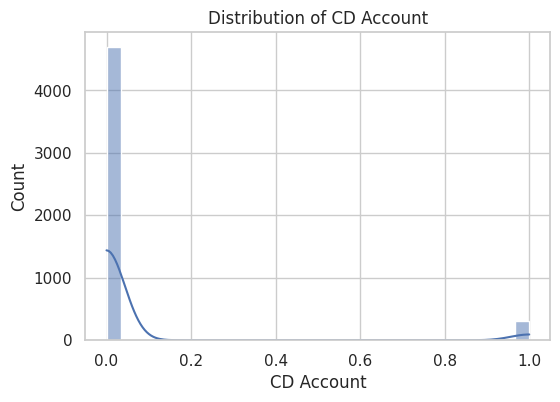

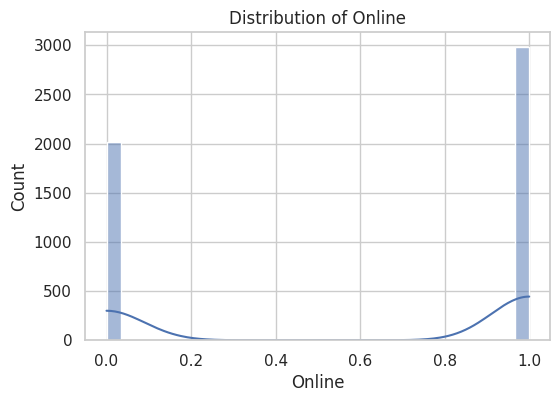

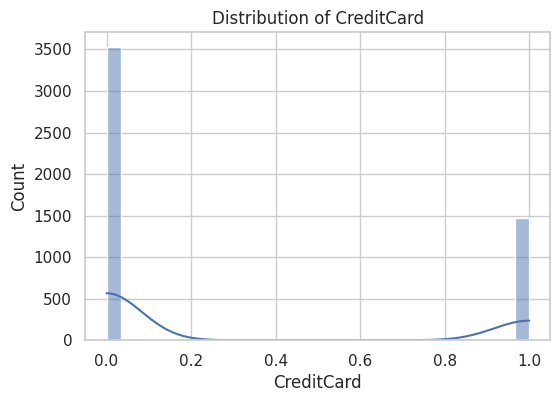

In [9]:
# Univariate Analysis

# Numeric columns distribution
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

# Categorical columns distribution
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df)
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
    plt.show()

Bivariate Analysis

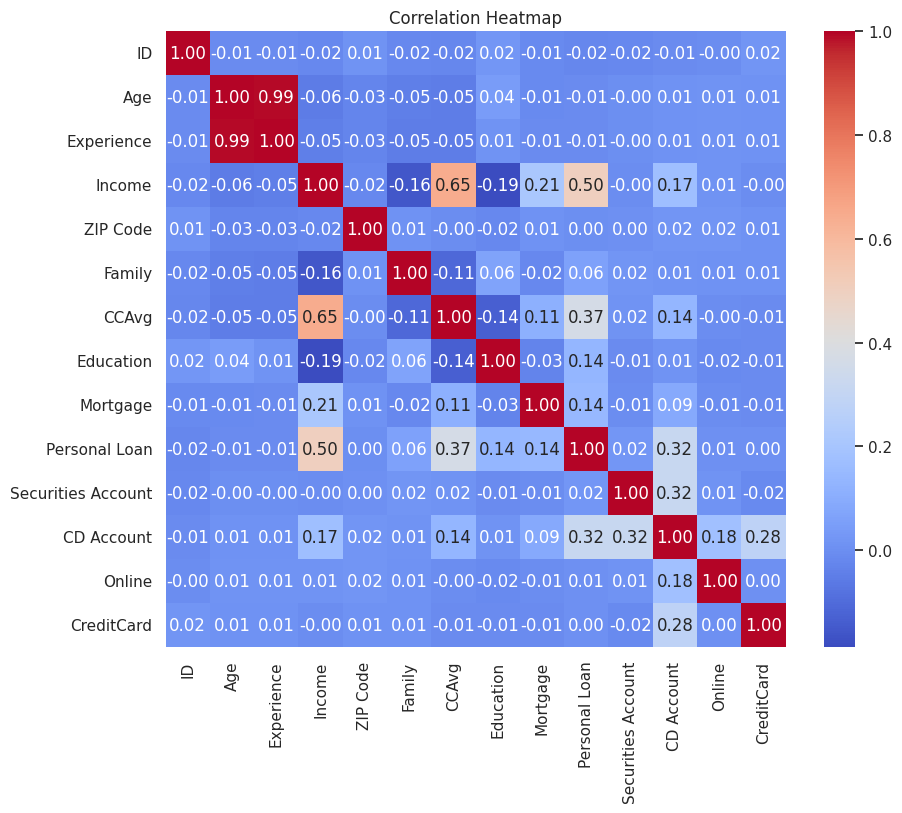

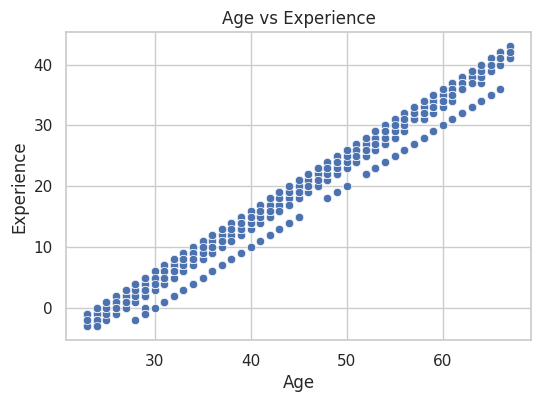

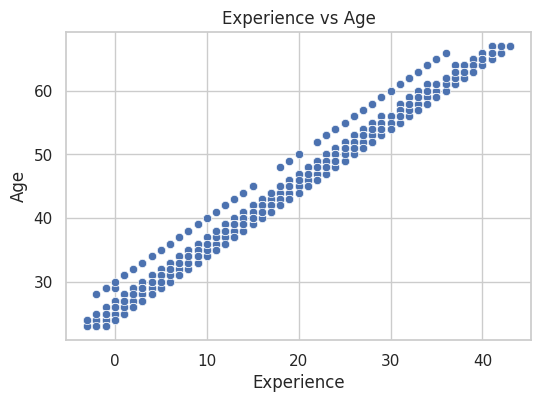

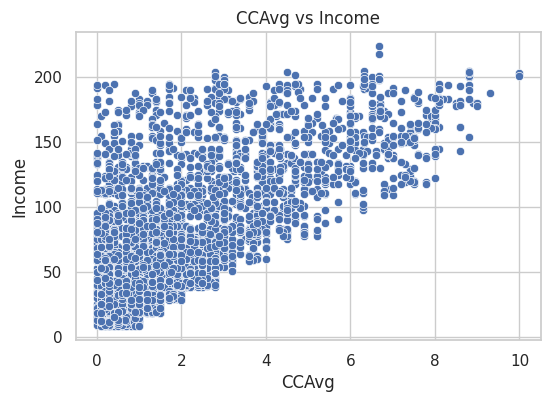

In [10]:
# Bivariate Analysis

# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Scatter plots for highly correlated pairs
top_corr = corr.abs().unstack().sort_values(ascending=False)
top_pairs = [pair for pair in top_corr.index if pair[0] != pair[1]][:3]
for x, y in top_pairs:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[x], y=df[y])
    plt.title(f"{x} vs {y}")
    plt.show()

# Boxplots for numerical vs categorical
for col in cat_cols:
    for num in numeric_cols:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=col, y=num, data=df)
        plt.title(f"{num} by {col}")
        plt.xticks(rotation=45)
        plt.show()

Multivariate Analysis

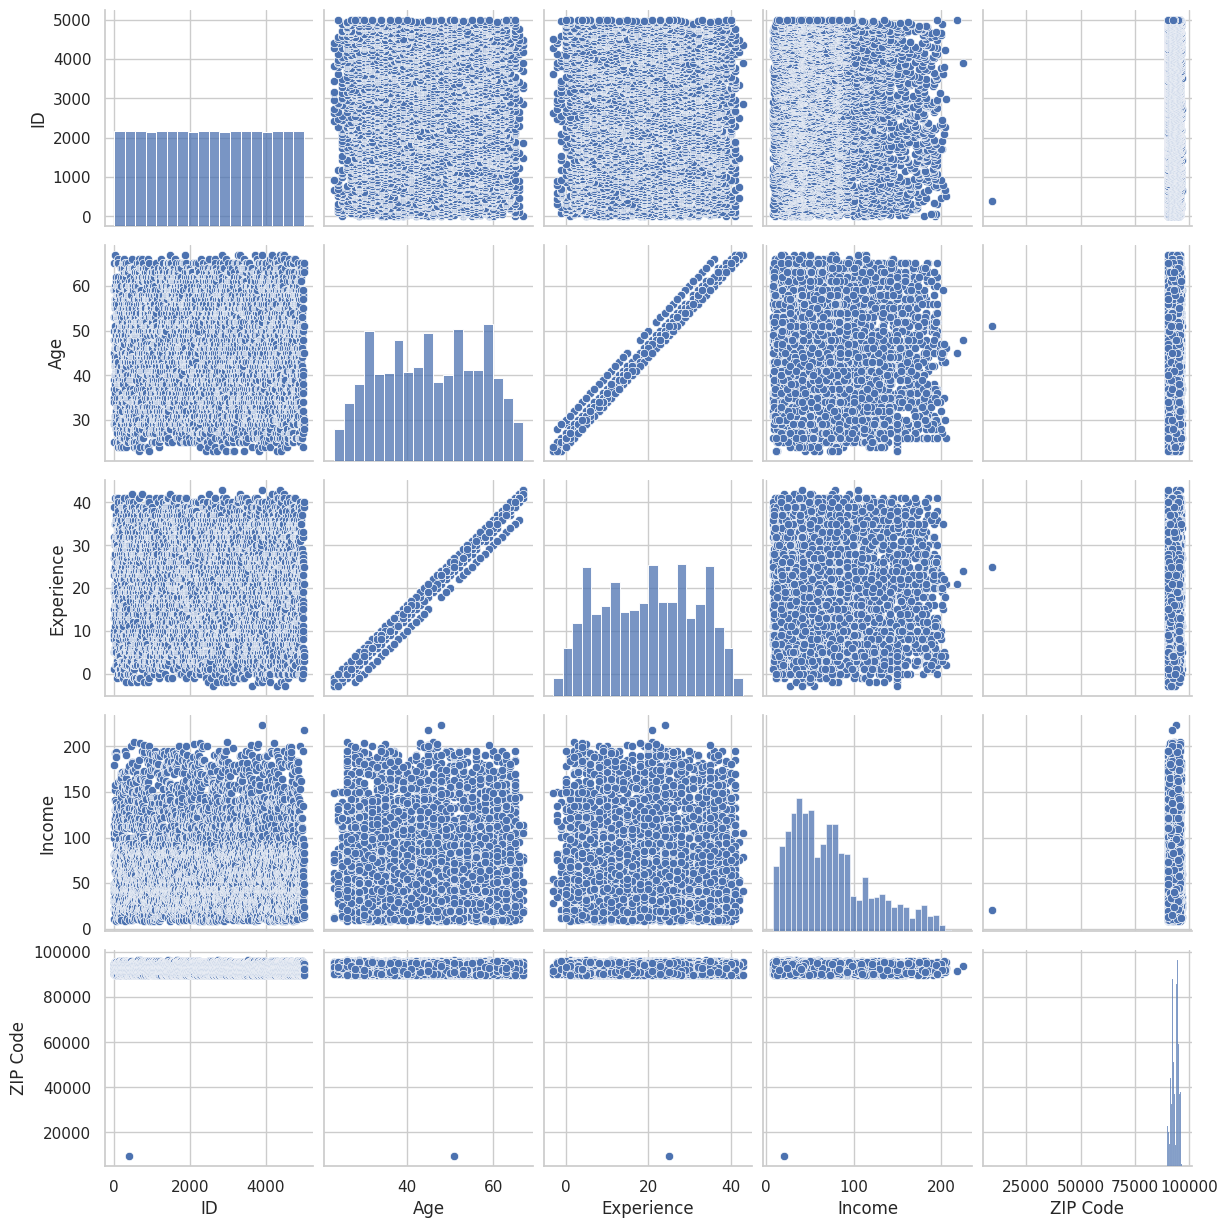

In [11]:
# Multivariate Analysis
# Pairplot (first 5 numeric columns for clarity)
sns.pairplot(df[numeric_cols[:5]])
plt.show()

# Grouped bar plot example (if 2+ categorical columns exist)
if len(cat_cols) >= 2:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=cat_cols[0], hue=cat_cols[1], data=df)
    plt.title(f"{cat_cols[0]} by {cat_cols[1]}")
    plt.show()

## Phase 2

In [12]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

In [13]:
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/credit%20card.csv"
df = pd.read_csv(url, na_values=['?'])

In [14]:
# Basic info
print("Shape:", df.shape)
print(df.dtypes)
print(df.head())

Shape: (5000, 14)
ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan         float64
Securities Account    float64
CD Account            float64
Online                  int64
CreditCard            float64
dtype: object
   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCar

In [15]:
# Check for date/time columns (YYYY-MM-DD or HH:MM:SS)
has_datetime_like = any(df[c].astype(str).str.match(r"^\d{4}-\d{2}-\d{2}$").any() for c in df.columns) \
                   or any(df[c].astype(str).str.match(r"^\d{2}:\d{2}:\d{2}$").any() for c in df.columns)
print("Datetime-like present?", has_datetime_like)
if not has_datetime_like:
    print("Skipping time-series analysis (no YYYY-MM-DD or HH:MM:SS columns).")


Datetime-like present? False
Skipping time-series analysis (no YYYY-MM-DD or HH:MM:SS columns).


In [16]:
# Column lists
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
print("Numeric cols:", numeric_cols)
print("Categorical cols:", cat_cols)

Numeric cols: ['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
Categorical cols: []


In [18]:
# --- 1D analysis ---
print("\n=== 1D ANALYSIS ===")
skews = df[numeric_cols].skew().sort_values(key=lambda x: np.abs(x), ascending=False)
print("Skewness (absolute sorted):\n", skews.round(3))

quantiles = df[numeric_cols].quantile([0,0.1,0.25,0.5,0.75,0.9,1]).T
print("\nSelected quantiles:\n", quantiles.round(3))


=== 1D ANALYSIS ===
Skewness (absolute sorted):
 ZIP Code             -12.500
CD Account             3.691
Personal Loan          2.739
Securities Account     2.588
Mortgage               2.104
CCAvg                  1.598
CreditCard             0.904
Income                 0.841
Online                -0.395
Education              0.227
Family                 0.155
Age                   -0.029
Experience            -0.026
ID                     0.000
dtype: float64

Selected quantiles:
                       0.00     0.10      0.25     0.50      0.75     0.90  \
ID                     1.0    500.9   1250.75   2500.5   3750.25   4500.1   
Age                   23.0     30.0     35.00     45.0     55.00     61.0   
Experience            -3.0      4.0     10.00     20.0     30.00     36.0   
Income                 8.0     22.0     39.00     64.0     98.00    145.0   
ZIP Code            9307.0  90275.0  91911.00  93437.0  94608.00  95138.0   
Family                 1.0      1.0      1.00

In [21]:
# Frequency
for c in cat_cols:
    print(f"\nValue counts for {c}:\n", df[c].value_counts(dropna=False))


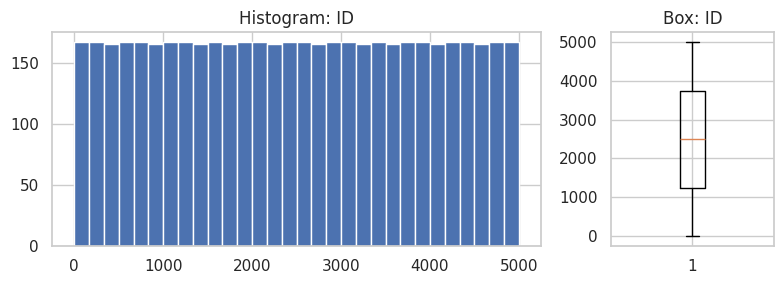

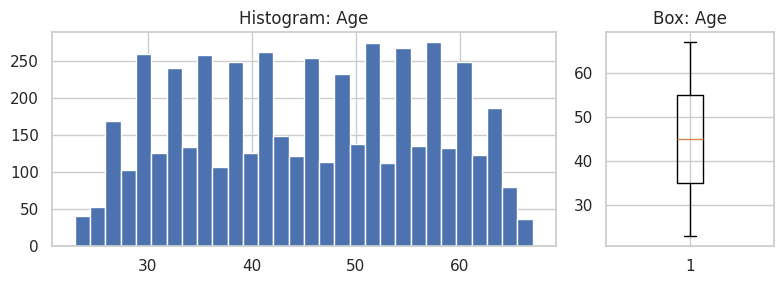

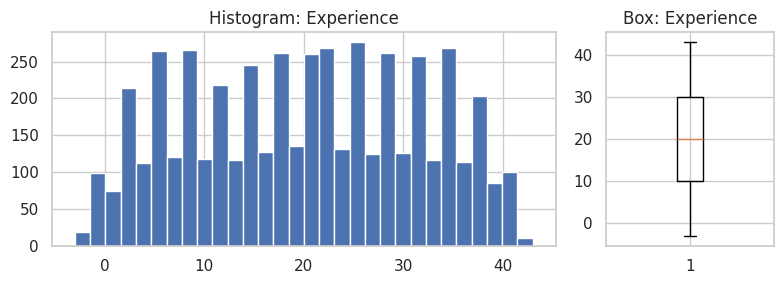

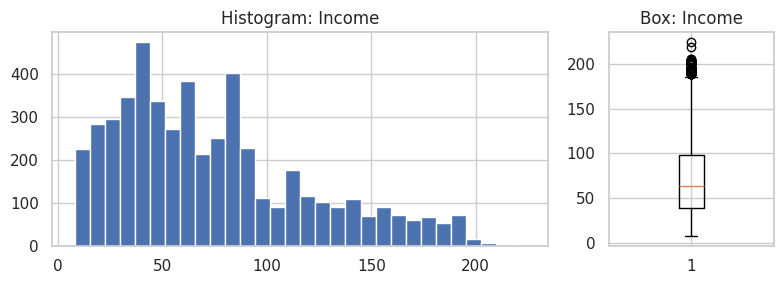

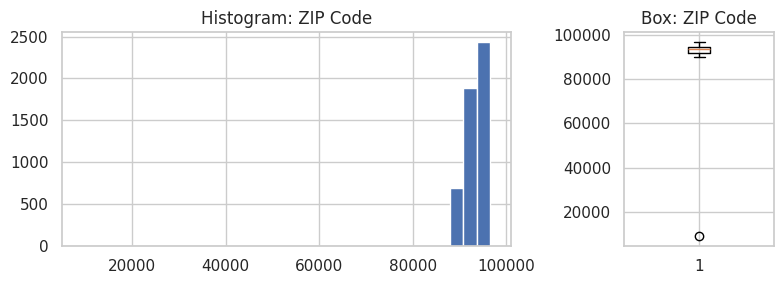

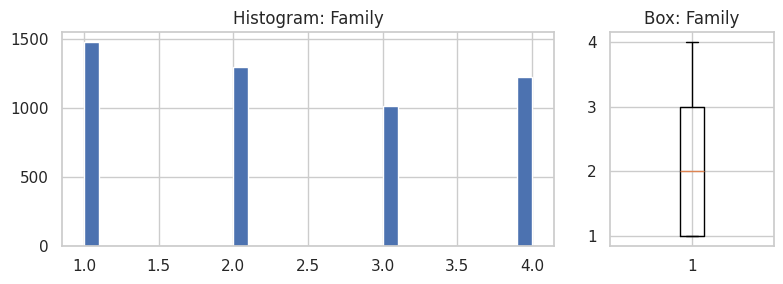

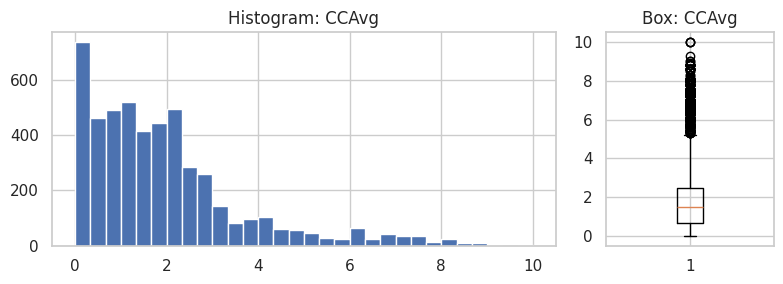

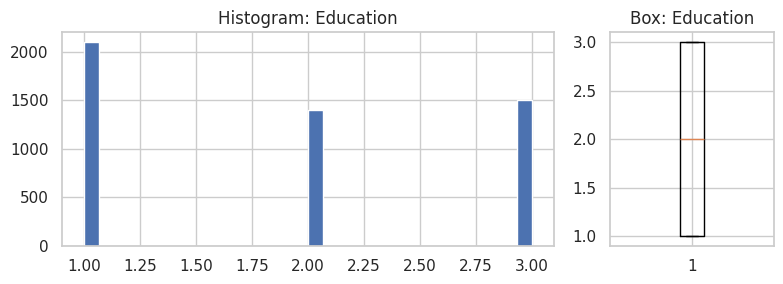

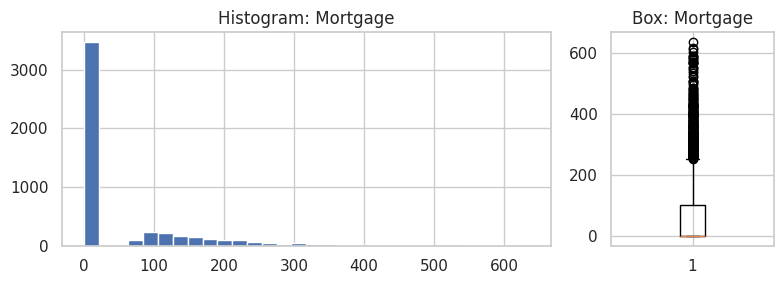

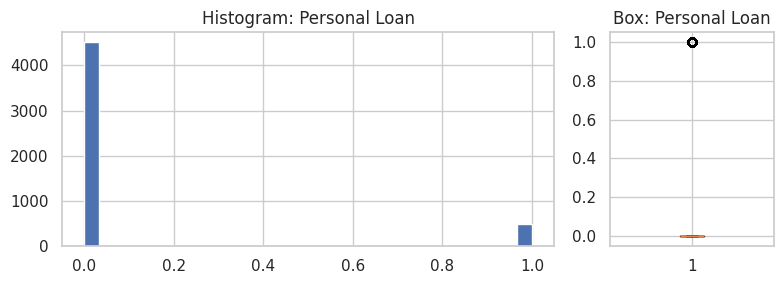

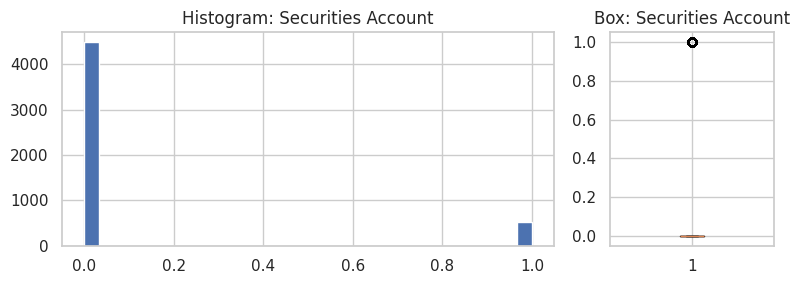

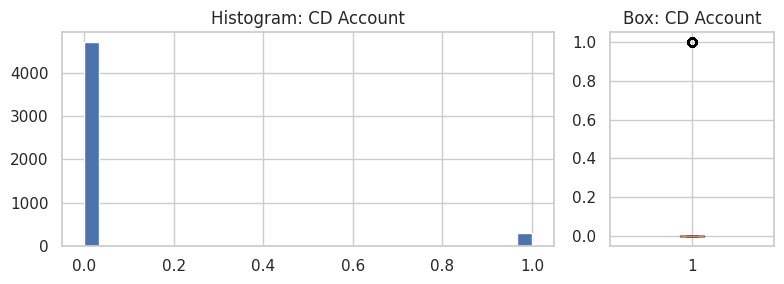

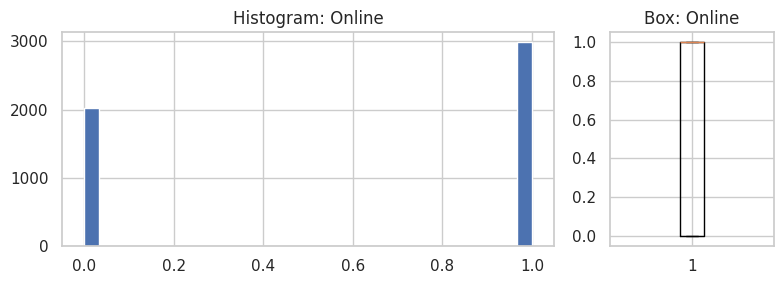

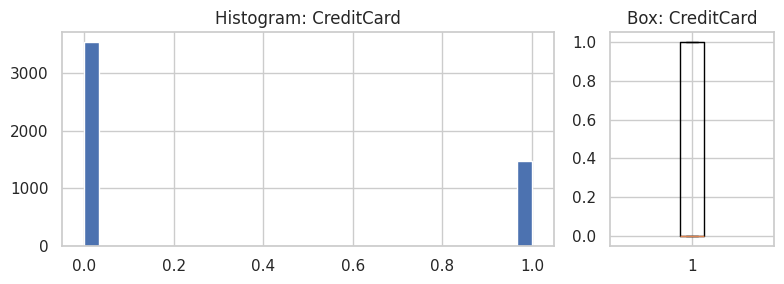

In [22]:
# Plot histogram + box for each numeric column (one figure per variable)
for col in numeric_cols:
    fig, (ax_hist, ax_box) = plt.subplots(1,2, figsize=(8,3), gridspec_kw={'width_ratios':[3,1]})
    ax_hist.hist(df[col].dropna(), bins=30)
    ax_hist.set_title(f"Histogram: {col}")
    ax_box.boxplot(df[col].dropna(), vert=True)
    ax_box.set_title(f"Box: {col}")
    plt.tight_layout()
    plt.show()


In [25]:
# --- 2D analysis ---
print("\n=== 2D ANALYSIS ===")
corr = df[numeric_cols].corr()
print("Correlation matrix:\n", corr.round(3))


=== 2D ANALYSIS ===
Correlation matrix:
                        ID    Age  Experience  Income  ZIP Code  Family  CCAvg  \
ID                  1.000 -0.008      -0.008  -0.018     0.013  -0.017 -0.025   
Age                -0.008  1.000       0.994  -0.055    -0.029  -0.046 -0.052   
Experience         -0.008  0.994       1.000  -0.047    -0.029  -0.053 -0.050   
Income             -0.018 -0.055      -0.047   1.000    -0.016  -0.158  0.646   
ZIP Code            0.013 -0.029      -0.029  -0.016     1.000   0.012 -0.004   
Family             -0.017 -0.046      -0.053  -0.158     0.012   1.000 -0.109   
CCAvg              -0.025 -0.052      -0.050   0.646    -0.004  -0.109  1.000   
Education           0.021  0.041       0.013  -0.188    -0.017   0.065 -0.136   
Mortgage           -0.014 -0.013      -0.011   0.207     0.007  -0.020  0.110   
Personal Loan      -0.026 -0.008      -0.007   0.503    -0.000   0.061  0.367   
Securities Account -0.017 -0.000      -0.001  -0.002     0.005   0.

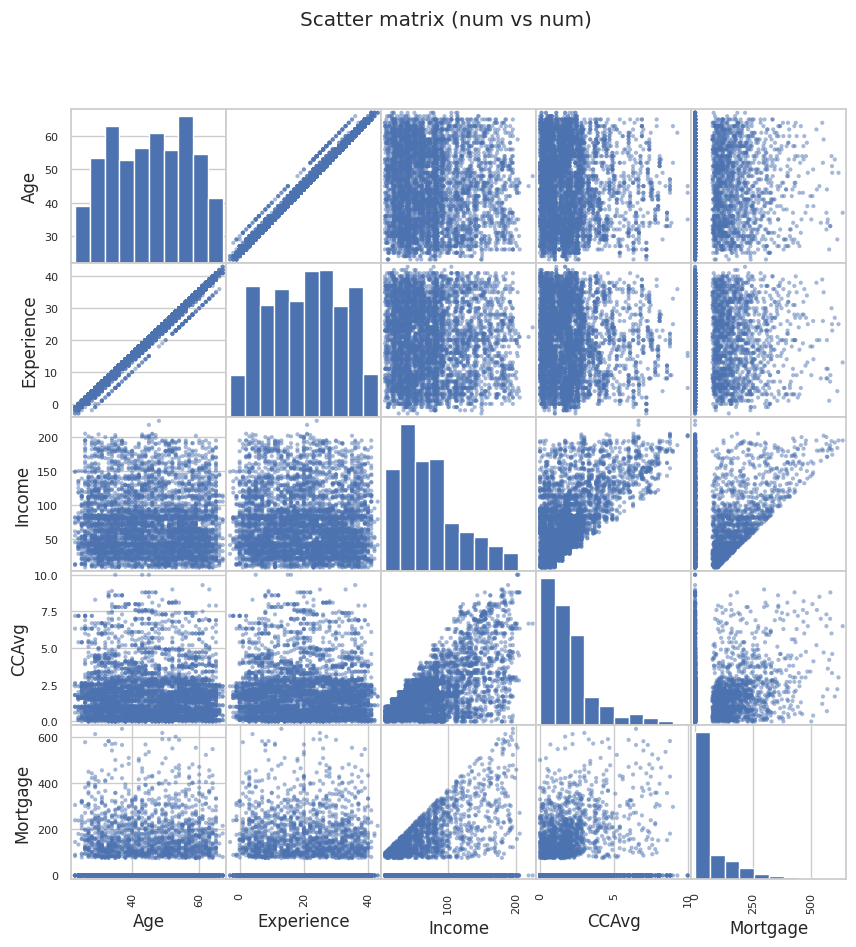

In [26]:
# Scatter matrix for selected numeric subset
subset = ['Age','Experience','Income','CCAvg','Mortgage']
subset = [s for s in subset if s in df.columns]
scatter_matrix(df[subset], figsize=(10,10), diagonal='hist')
plt.suptitle("Scatter matrix (num vs num)")
plt.show()

/tmp/ipython-input-2047574673.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=labels)


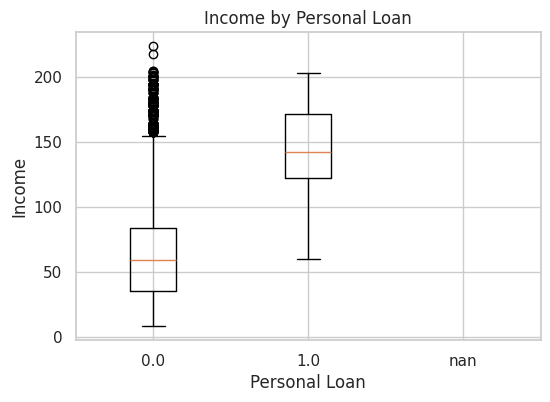

/tmp/ipython-input-2047574673.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=labels)


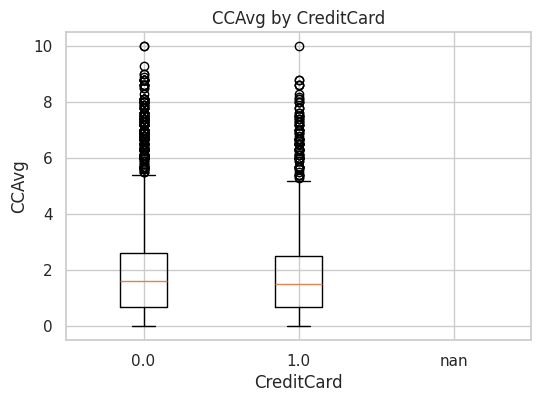

/tmp/ipython-input-2047574673.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=labels)


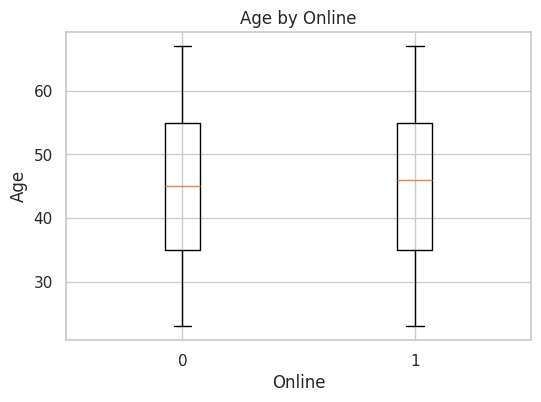

In [27]:
# Numeric vs categorical: boxplots
pairs = [('Income','Personal Loan'), ('CCAvg','CreditCard'), ('Age','Online')]
for num,cat in pairs:
    if num in df.columns and cat in df.columns:
        groups = [df[df[cat]==val][num].dropna() for val in sorted(df[cat].unique())]
        labels = [str(val) for val in sorted(df[cat].unique())]
        plt.figure(figsize=(6,4))
        plt.boxplot(groups, labels=labels)
        plt.title(f"{num} by {cat}")
        plt.xlabel(cat); plt.ylabel(num)
        plt.show()


Contingency (Personal Loan vs CreditCard):
 CreditCard      0.0   1.0   All
Personal Loan                  
0.0            3183  1325  4508
1.0             337   143   480
All            3520  1468  4988


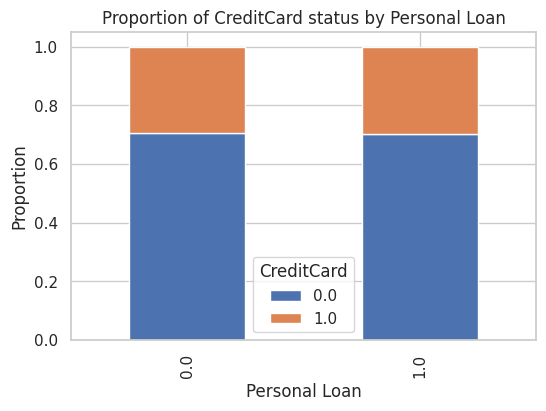

In [28]:
# Categorical vs categorical: contingency
if 'Personal Loan' in df.columns and 'CreditCard' in df.columns:
    ct = pd.crosstab(df['Personal Loan'], df['CreditCard'], margins=True)
    print("\nContingency (Personal Loan vs CreditCard):\n", ct)
    prop = pd.crosstab(df['Personal Loan'], df['CreditCard'], normalize='index')
    prop.plot(kind='bar', stacked=True, figsize=(6,4))
    plt.title("Proportion of CreditCard status by Personal Loan")
    plt.ylabel("Proportion")
    plt.show()


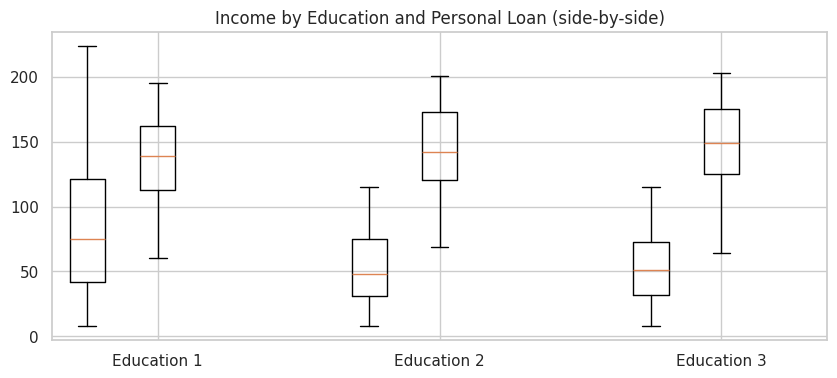

In [29]:
# --- 3D / Grouped boxplots ---
if {'Education','Personal Loan','Income'}.issubset(df.columns):
    ed_levels = sorted(df['Education'].unique())
    loan_levels = sorted(df['Personal Loan'].unique())
    data_for_plot = []
    positions = []
    for i, ed in enumerate(ed_levels):
        for j, loan in enumerate(loan_levels):
            vals = df[(df['Education']==ed) & (df['Personal Loan']==loan)]['Income'].dropna()
            data_for_plot.append(vals)
            positions.append(i*(len(loan_levels)+1) + j)
    plt.figure(figsize=(10,4))
    plt.boxplot(data_for_plot, positions=positions)
    centers = [np.mean([i*(len(loan_levels)+1)+j for j in range(len(loan_levels))]) for i in range(len(ed_levels))]
    plt.xticks(centers, [f"Education {e}" for e in ed_levels])
    plt.title("Income by Education and Personal Loan (side-by-side)")
    plt.show()


In [30]:
# --- Module 5 clustering: Hierarchical Agglomerative ---
features = ['Age','Experience','Income','CCAvg','Mortgage','Family']
features = [f for f in features if f in df.columns]
X = df[features].fillna(df[features].median())
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

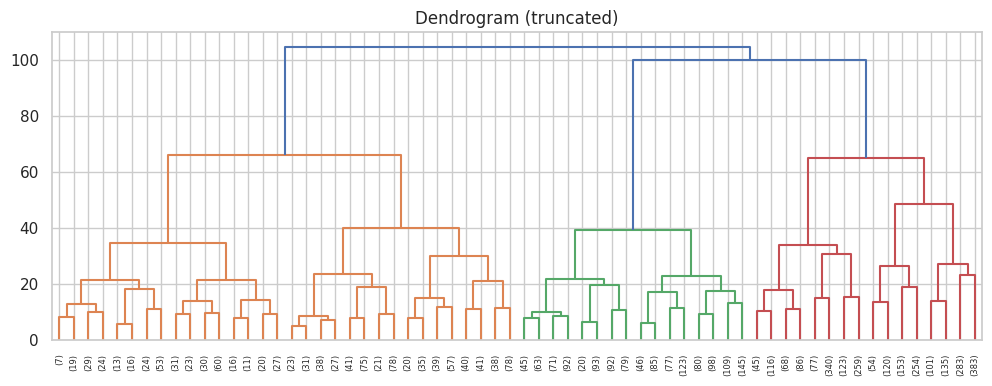

In [31]:
# dendrogram
Z = linkage(X_scaled, method='ward')
plt.figure(figsize=(12,4))
dendrogram(Z, truncate_mode='level', p=5)
plt.title("Dendrogram (truncated)")
plt.show()

In [32]:
# Agglomerative clustering (n_clusters = 3)
n_clusters = 3
agg = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
labels = agg.fit_predict(X_scaled)
df['hclust_label'] = labels
print("Cluster sizes:\n", pd.Series(labels).value_counts().sort_index())


Cluster sizes:
 0    1085
1    2597
2    1318
Name: count, dtype: int64


In [33]:
# cluster centers approx (inverse transform of mean of scaled features per cluster)
cluster_centers = pd.DataFrame(
    scaler.inverse_transform([X_scaled[labels==i].mean(axis=0) for i in range(n_clusters)]),
    columns=features
)
print("\nCluster centers (approx):\n", cluster_centers.round(2))



Cluster centers (approx):
      Age  Experience  Income  CCAvg  Mortgage  Family
0  47.27       22.19  137.34   4.06    114.52    1.90
1  38.38       13.08   60.75   1.42     41.00    2.43
2  57.45       32.22   47.12   1.22     39.27    2.73


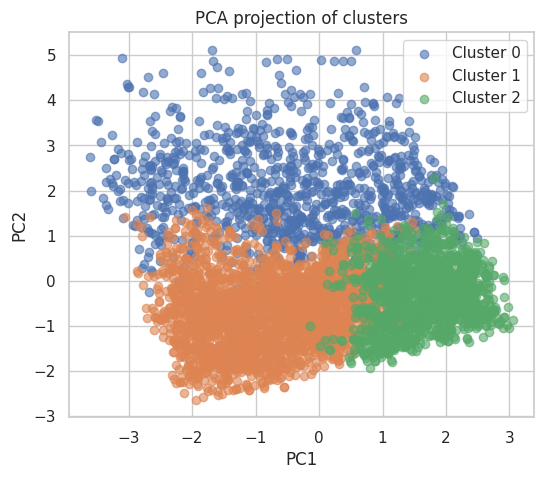

In [34]:
# PCA 2D plot
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(6,5))
for lab in sorted(np.unique(labels)):
    plt.scatter(X_pca[labels==lab,0], X_pca[labels==lab,1], label=f"Cluster {lab}", alpha=0.6)
plt.legend(); plt.title("PCA projection of clusters"); plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()


In [35]:
print("First 10 rows with assigned cluster:\n", df[features + ['hclust_label']].head(10))

First 10 rows with assigned cluster:
    Age  Experience  Income  CCAvg  Mortgage  Family  hclust_label
0   25           1      49    1.6         0       4             1
1   45          19      34    1.5         0       3             1
2   39          15      11    1.0         0       1             1
3   35           9     100    2.7         0       1             1
4   35           8      45    1.0         0       4             1
5   37          13      29    0.4       155       4             1
6   53          27      72    1.5         0       2             1
7   50          24      22    0.3         0       1             1
8   35          10      81    0.6       104       3             1
9   34           9     180    8.9         0       1             0
